In [ ]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import string
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 17.2MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
print("Start of the preprocess\n")

# Copy the dataset to the local environment
!cp "/content/drive/MyDrive/Combined_News_DJIA.csv" "Combined_News_DJIA.csv"

# Without merge! 
# Load the dataset 
df_combined = pd.read_csv('Combined_News_DJIA.csv', index_col = "Date")

# Load the stock data
df_stock = web.DataReader("DJIA", data_source="yahoo", start="2008-08-08", 
                          end="2016-07-01")

temp_day = []

for day in range(len(df_stock)):
    temp_day.append(df_stock.index[day].date())

df_stock.index = temp_day

difference = []

for day in range(max(len(df_combined), len(df_stock))):
    if str(df_combined.index[day]) != str(df_stock.index[day]):
        difference.append(day)

if len(difference) is 0:
    print("The dates matched!\n")

difference = []

for day in range(len(df_stock)):
    # label should be 1 -> rise
    if int(df_stock["Adj Close"][day]) >= int(df_stock["Adj Close"][day - 1]):
        if df_combined["Label"][day] != 1:
            difference.append(str(df_stock.index[day]))
            print("Problem at day " + str(df_stock.index[day]))
            print("Today: " + str(df_stock["Adj Close"][day]) +"\t\tYesterday: " + str(df_stock["Adj Close"][day - 1]) + "\t\tLabel: " + str(df_combined["Label"][day]) + "\n")

    # label should be 0 -> fall
    if int(df_stock["Adj Close"][day]) < int(df_stock["Adj Close"][day - 1]):
        if df_combined["Label"][day] != 0:
            difference.append(str(df_stock.index[day]))
            print("Problem at day " + str(df_stock.index[day]))
            print("Today: " + str(df_stock["Adj Close"][day]) +"\t\tYesterday: " + str(df_stock["Adj Close"][day - 1]) + "\t\tLabel: " + str(df_combined["Label"][day]) + "\n") 

# correct the wrong labels
for row in difference:
    if df_combined.loc[row, "Label"] == 0:
        df_combined.loc[row, "Label"] = 1
    else:
        df_combined.loc[row, "Label"] = 0

print("All differences: " + str(len(difference)) + "\nFixed!\n") 

# Find the cells with NaN and after the rows for them
is_NaN = df_combined.isnull()
row_has_NaN = is_NaN.any(axis = 1)
rows_with_NaN = df_combined[row_has_NaN]

# Replace them
df_combined = df_combined.replace(np.nan, " ")

# Check the process
is_NaN = df_combined.isnull()
row_has_NaN = is_NaN.any(axis = 1)
rows_with_NaN = df_combined[row_has_NaN]

assert len(rows_with_NaN) is 0

# Get the column names
combined_column_names = []
for column in df_combined.columns:
  combined_column_names.append(column)

for column in range(len(combined_column_names) - 1):
    temp_news = []

    for row in range(len(df_combined)):   
        news = df_combined[combined_column_names[column + 1]][row]
        # Remove the b character at the begining of the string
        if news[0] is "b":
            news = " " + news[1:]
        temp_news.append(news)

    temp_to_switch = []
    # Removing punctuations
    for line in temp_news:
      temp_attach = ""
      for word in line:
        temp = " "
        if word not in string.punctuation:
          temp = word
        temp_attach = temp_attach + "".join(temp)
      temp_to_switch.append(temp_attach)

    temp_news = temp_to_switch
    temp_to_switch = []
    # Remove numbers
    for line in temp_news:
      temp_attach = ""
      for word in line:
        temp = " "
        if not word.isdigit():
          temp = word
        temp_attach = temp_attach + "".join(temp)
      temp_to_switch.append(temp_attach)

    temp_news = temp_to_switch
    # Remove space
    for line in range(len(temp_news)):    
      temp_news[line] = " ".join(temp_news[line].split())

    # Converting headlines to lower case
    for line in range(len(temp_news)): 
        temp_news[line] = temp_news[line].lower()

    # update
    df_combined[combined_column_names[column + 1]] = temp_news

print("\nFirst full sentence:\n" + str(df_combined["Top1"][0]))
print("\nFirst label:\n" + str(df_combined["Label"][0]))

Start of the preprocess

The dates matched!

Problem at day 2010-10-14
Today: 11096.919921875		Yesterday: 11096.080078125		Label: 0

Problem at day 2012-11-12
Today: 12815.080078125		Yesterday: 12815.3896484375		Label: 0

Problem at day 2012-11-15
Today: 12570.9501953125		Yesterday: 12570.9501953125		Label: 0

Problem at day 2013-04-12
Today: 14865.0595703125		Yesterday: 14865.1396484375		Label: 0

Problem at day 2014-04-24
Today: 16501.650390625		Yesterday: 16501.650390625		Label: 0

Problem at day 2015-08-12
Today: 17402.509765625		Yesterday: 17402.83984375		Label: 0

Problem at day 2015-11-27
Today: 17813.390625		Yesterday: 17813.390625		Label: 0

All differences: 7
Fixed!


First full sentence:
georgia downs two russian warplanes as countries move to brink of war

First label:
0


In [ ]:
# Show the data frame
df_combined.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,georgia downs two russian warplanes as countri...,breaking musharraf to be impeached,russia today columns of troops roll into south...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n offici...,russian tanks have entered south ossetia whils...,breaking georgia invades south ossetia russia ...,the enemy combatent trials are nothing but a s...,georgian troops retreat from s osettain capita...,did the u s prep georgia for war with russia,rice gives green light for israel to attack ir...,announcing class action lawsuit on behalf of a...,so russia and georgia are at war and the nyt s...,china tells bush to stay out of other countrie...,did world war iii start today,georgia invades south ossetia if russia gets i...,al qaeda faces islamist backlash,condoleezza rice the us would not act to preve...,this is a busy day the european union has appr...,georgia will withdraw soldiers from iraq to he...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south ossetia,indian shoe manufactory and again in a series ...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge
2008-08-11,1,why wont america and nato help us if they wont...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tra...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s ossetia blames...,welcome to world war iv now in high definition,georgia s move a mistake of monumental proport...,russia presses deeper into georgia u s says re...,abhinav bindra wins first ever individual olym...,u s ship heads for arctic to define territory,drivers in a jerusalem taxi station threaten t...,the french team is stunned by phelps and the x...,israel and the us behind the georgian aggression,do not believe tv neither russian nor georgian...,riots are still going on in montreal canada be...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states over ...,perhaps the question about the georgia russia ...,russia is so much better at war,so this is what it s come to trading sex for food
2008-08-12,0,remember that adorable year old who sang at th...,russia ends georgia operation,if we had no sexual harassment we would have n...,al qa eda is losing support in iraq because of...,ceasefire in georgia putin outmaneuvers the west,why microsoft and intel tried to kill the xo l...,stratfor the russo georgian war and the balanc...,i m trying to get a sense of this whole georgi...,the us military was surprised by the timing an...,u s beats war drum as iran dumps the dollar,gorbachev georgian military attacked the south...,cnn use footage of tskhinvali ruins to cover g...,beginning a war as the olympics were opening v...,pyramids as large as the luxor stacked into a ...,the top party cities in the world,u s troops still in georgia did you know they ...,why russias response to georgia was right,gorbachev accuses u s of making a serious blun...,russia georgia and nato cold war two,remember that adorable year old who led your c...,war in georgia the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america the new mexico,bbc news asia pacific extinction by man not cl...
2008-08-13,0,u s refuses israel weapons to attack iran report,when the president ordered to attack tskhinval...,israel clears troops who killed reuters cameraman,britain s policy of being tough on drugs is po...,body of year old found in trunk latest ransom ...,china has moved mi

In [ ]:
df_stock.head()

,High,Low,Open,Close,Volume,Adj Close
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688


In [ ]:
df_input = df_combined.copy()

for column in range(len(df_input.columns) - 1):  
    df_input.drop(df_input.columns[1], axis=1, inplace=True)

analyzer = SentimentIntensityAnalyzer()

# Get the column names
combined_column_names = []
for column in df_combined.columns:
  combined_column_names.append(column)

sentiment_raw_sum = []
sentiment_raw_avg = []
sentiment_raw_min = []
sentiment_raw_max = []
sentiment_sum_mov_avg = []
sentiment_avg_mov_avg = []
sentiment_min_mov_avg = []
sentiment_max_mov_avg = []

noun_counts = []
verb_counts = []

# get raw values
for row in range(len(df_combined)):
    temp_sentiment_sum = 0
    temp_sentiment_avg = 0
    temp_min = 10000000
    temp_max = -10000000

    temp_noun = 0
    temp_verb = 0

    for column in range(len(combined_column_names) - 1):   
        news = df_combined[combined_column_names[column + 1]][row]

        vs = analyzer.polarity_scores(news)
        curr_score = vs.get("compound")

        if curr_score < temp_min:
            temp_min = curr_score
        if curr_score > temp_max:
            temp_max = curr_score

        temp_sentiment_sum += curr_score

        tokens = nltk.word_tokenize(news)
        text = nltk.Text(tokens)
        tagged = nltk.pos_tag(text)

        counts = Counter(tag for word,tag in tagged)
        try:
            temp_noun += counts.get("NN")
        except:
            temp_noun += 0

        try:
            temp_verb += counts.get("VBZ")
        except:
            temp_verb += 0

    temp_sentiment_avg = temp_sentiment_sum / 25

    if row == 0:
      sentiment_sum_mov_avg.append(temp_sentiment_sum)
      sentiment_avg_mov_avg.append(temp_sentiment_avg)
      sentiment_min_mov_avg.append(temp_min)
      sentiment_max_mov_avg.append(temp_max)
    elif row == 1:
      sum_mov_avg = (sentiment_raw_sum[row - 1] + temp_sentiment_sum) / 2
      sentiment_sum_mov_avg.append(sum_mov_avg)
      avg_mov_avg = (sentiment_raw_avg[row - 1] + temp_sentiment_avg) / 2
      sentiment_avg_mov_avg.append(avg_mov_avg)
      min_mov_avg = (sentiment_raw_min[row - 1] + temp_min) / 2
      sentiment_min_mov_avg.append(min_mov_avg)
      max_mov_avg = (sentiment_raw_max[row - 1] + temp_max) / 2
      sentiment_max_mov_avg.append(max_mov_avg)      
    else:
      sum_mov_avg = (sentiment_raw_sum[row - 1] + sentiment_raw_sum[row - 2] + temp_sentiment_sum) / 3
      sentiment_sum_mov_avg.append(sum_mov_avg)
      avg_mov_avg = (sentiment_raw_avg[row - 1] + sentiment_raw_avg[row - 2] + temp_sentiment_avg) / 3
      sentiment_avg_mov_avg.append(avg_mov_avg)
      min_mov_avg = (sentiment_raw_min[row - 1] + sentiment_raw_min[row - 2] + temp_min) / 3
      sentiment_min_mov_avg.append(min_mov_avg)
      max_mov_avg = (sentiment_raw_max[row - 1] + sentiment_raw_max[row - 2] + temp_max) / 3
      sentiment_max_mov_avg.append(max_mov_avg)            

    # update
    sentiment_raw_avg.append(temp_sentiment_avg)
    sentiment_raw_sum.append(temp_sentiment_sum)
    sentiment_raw_min.append(temp_min)
    sentiment_raw_max.append(temp_max)
    noun_counts.append(temp_noun)
    verb_counts.append(temp_verb)    

df_input["Sum for d"] = sentiment_raw_sum
df_input["Avg for d"] = sentiment_raw_avg
df_input["Min for d"] = sentiment_raw_min
df_input["Max for d"] = sentiment_raw_max
df_input["Sum 3d moving avg"] = sentiment_sum_mov_avg
df_input["Avg 3d moving avg"] = sentiment_avg_mov_avg
df_input["Min 3d moving avg"] = sentiment_min_mov_avg
df_input["Max 3d moving avg"] = sentiment_max_mov_avg
df_input["Noun counts"] = noun_counts
df_input["Verb counts"] = verb_counts

df_input

,Label,Sum for d,Avg for d,Min for d,Max for d,Sum 3d moving avg,Avg 3d moving avg,Min 3d moving avg,Max 3d moving avg,Noun counts,Verb counts
Date,,,,,,,,,,,
2008-08-08,0,-9.5673,-0.382692,-0.9260,0.2144,-9.567300,-0.382692,-0.926000,0.214400,105,16
2008-08-11,1,-4.3508,-0.174032,-0.8271,0.7783,-6.959050,-0.278362,-0.876550,0.496350,80,9
2008-08-12,0,-5.3944,-0.215776,-0.8591,0.5423,-6.437500,-0.257500,-0.870733,0.511667,96,7
2008-08-13,0,-3.8951,-0.155804,-0.8074,0.5106,-4.546767,-0.181871,-0.831200,0.610400,87,12
2008-08-14,1,-3.8677,-0.154708,-0.8689,0.7096,-4.385733,-0.175429,-0.845133,0.587500,83,6
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0,-2.3957,-0.095828,-0.8720,0.8442,-2.821433,-0.112857,-0.870967,0.733467,116,10
2016-06-28,1,-1.2613,-0.050452,-0.8818,0.8316,-1.719333,-0.068773,-0.861800,0.745200,129,11
2016-06-29,1,-4.8701,-0.194804,-0.9213,0.7783,-2.842367,-0.113695,-0.891700,0.818033,112,13


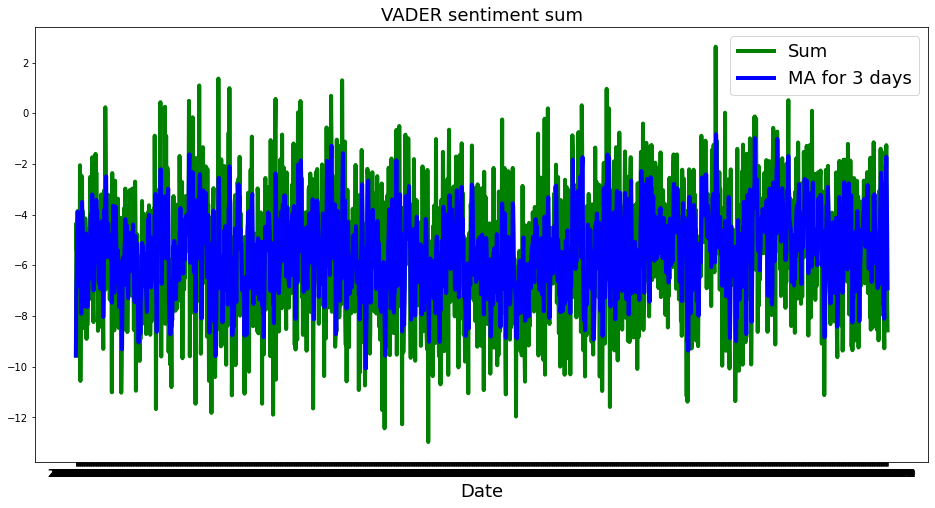

In [ ]:
# Visualize
plt.figure(figsize=(16,8))
plt.title("VADER sentiment sum", fontsize = 18)
ax = plt.gca()
plt.plot(df_input["Sum for d"], color = "green", linewidth = 4,
         label = "Sum")
plt.plot(df_input["Sum 3d moving avg"], color = "blue", linewidth = 4,
         label = "MA for 3 days")
plt.xlabel("Date", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

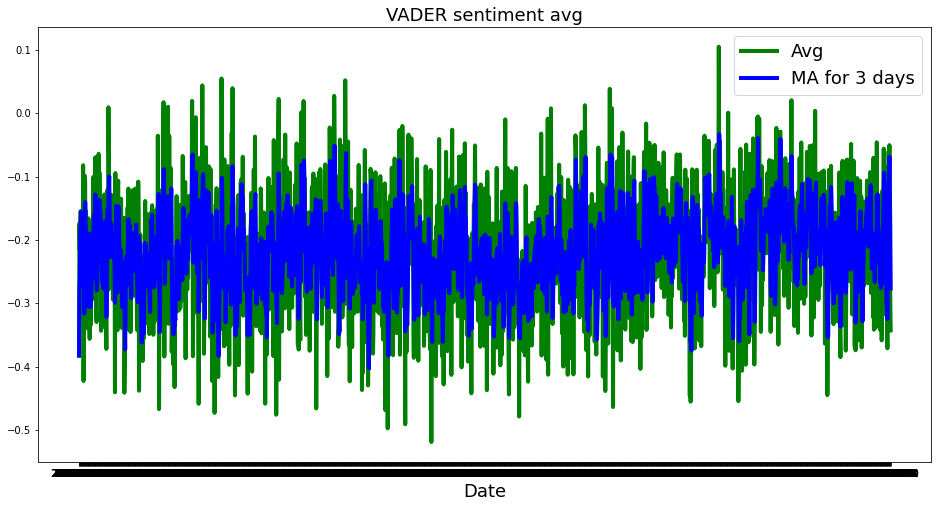

In [ ]:
# Visualize
plt.figure(figsize=(16,8))
plt.title("VADER sentiment avg", fontsize = 18)
ax = plt.gca()
plt.plot(df_input["Avg for d"], color = "green", linewidth = 4,
         label = "Avg")
plt.plot(df_input["Avg 3d moving avg"], color = "blue", linewidth = 4,
         label = "MA for 3 days")
plt.xlabel("Date", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

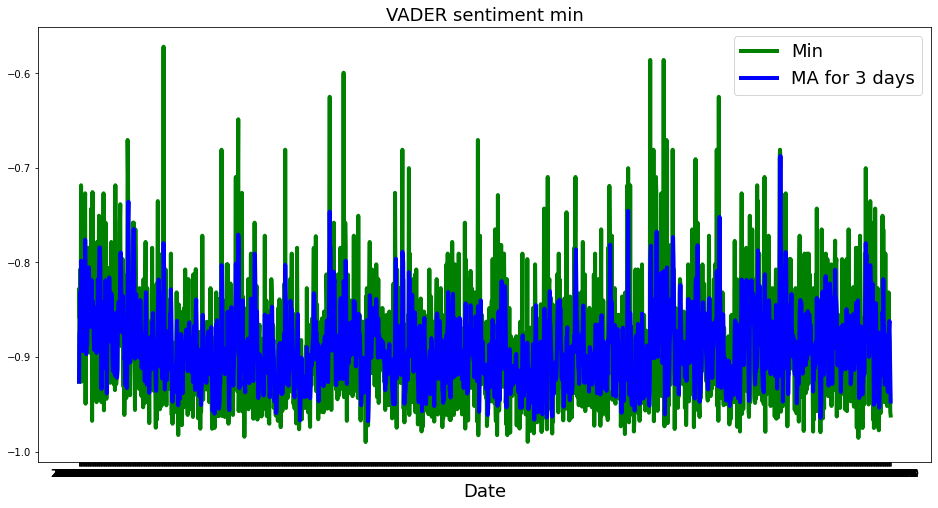

In [ ]:
# Visualize
plt.figure(figsize=(16,8))
plt.title("VADER sentiment min", fontsize = 18)
ax = plt.gca()
plt.plot(df_input["Min for d"], color = "green", linewidth = 4,
         label = "Min")
plt.plot(df_input["Min 3d moving avg"], color = "blue", linewidth = 4,
         label = "MA for 3 days")
plt.xlabel("Date", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

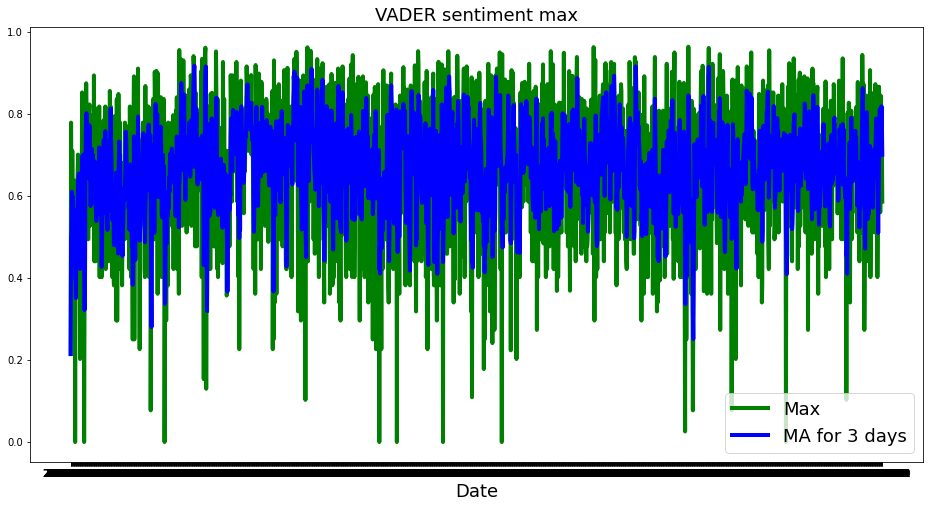

In [ ]:
# Visualize
plt.figure(figsize=(16,8))
plt.title("VADER sentiment max", fontsize = 18)
ax = plt.gca()
plt.plot(df_input["Max for d"], color = "green", linewidth = 4,
         label = "Max")
plt.plot(df_input["Max 3d moving avg"], color = "blue", linewidth = 4,
         label = "MA for 3 days")
plt.xlabel("Date", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

In [ ]:
df_input

,Label,Sum for d,Avg for d,Min for d,Max for d,Sum 3d moving avg,Avg 3d moving avg,Min 3d moving avg,Max 3d moving avg,Noun counts,Verb counts
Date,,,,,,,,,,,
2008-08-08,0,-9.5673,-0.382692,-0.9260,0.2144,-9.567300,-0.382692,-0.926000,0.214400,105,16
2008-08-11,1,-4.3508,-0.174032,-0.8271,0.7783,-6.959050,-0.278362,-0.876550,0.496350,80,9
2008-08-12,0,-5.3944,-0.215776,-0.8591,0.5423,-6.437500,-0.257500,-0.870733,0.511667,96,7
2008-08-13,0,-3.8951,-0.155804,-0.8074,0.5106,-4.546767,-0.181871,-0.831200,0.610400,87,12
2008-08-14,1,-3.8677,-0.154708,-0.8689,0.7096,-4.385733,-0.175429,-0.845133,0.587500,83,6
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,0,-2.3957,-0.095828,-0.8720,0.8442,-2.821433,-0.112857,-0.870967,0.733467,116,10
2016-06-28,1,-1.2613,-0.050452,-0.8818,0.8316,-1.719333,-0.068773,-0.861800,0.745200,129,11
2016-06-29,1,-4.8701,-0.194804,-0.9213,0.7783,-2.842367,-0.113695,-0.891700,0.818033,112,13


In [ ]:
from sklearn.utils import shuffle
from numpy.random import RandomState, SeedSequence
from numpy.random import MT19937

rs = RandomState(MT19937(SeedSequence(1234)))
# Do the shuffle
for i in range(500):
  df_input = shuffle(df_input, random_state = rs)

df_input

,Label,Sum for d,Avg for d,Min for d,Max for d,Sum 3d moving avg,Avg 3d moving avg,Min 3d moving avg,Max 3d moving avg,Noun counts,Verb counts
Date,,,,,,,,,,,
2010-10-21,1,-4.1349,-0.165396,-0.9524,0.8316,-4.651200,-0.186048,-0.941600,0.887733,115,8
2014-07-22,1,-4.5121,-0.180484,-0.9393,0.7783,-7.632533,-0.305301,-0.903500,0.628700,114,11
2014-04-11,0,-5.0681,-0.202724,-0.9186,0.5994,-5.527400,-0.221096,-0.862267,0.532500,149,16
2012-08-09,0,-6.5192,-0.260768,-0.9468,0.6597,-7.142333,-0.285693,-0.931367,0.558633,135,13
2014-10-15,0,-5.1637,-0.206548,-0.8934,0.5423,-5.499533,-0.219981,-0.879900,0.628100,123,18
...,...,...,...,...,...,...,...,...,...,...,...
2010-05-20,0,-6.1946,-0.247784,-0.8834,0.4215,-6.036833,-0.241473,-0.910733,0.587367,97,9
2016-05-09,0,-2.8099,-0.112396,-0.7430,0.7650,-4.749400,-0.189976,-0.871033,0.803733,119,18
2012-09-07,1,-5.3860,-0.215440,-0.9565,0.7096,-7.067333,-0.282693,-0.927367,0.550900,122,22


In [ ]:
#split
INPUT_SIZE = len(df_input)

TRAIN_SIZE = int(0.75 * INPUT_SIZE)
VALID_SIZE = int(0.1 * TRAIN_SIZE)

# Create the train data set
train_dataset = df_input[:TRAIN_SIZE - VALID_SIZE] 

# Create the validation data set
valid_dataset = df_input[TRAIN_SIZE - VALID_SIZE:TRAIN_SIZE] 

# Create the test data set
test_dataset = df_input[TRAIN_SIZE:]

In [ ]:
train_X_pre = train_dataset[train_dataset.columns[1:11]]
#normalize it
train_X = (train_X_pre - train_X_pre.mean()) / train_X_pre.std()
train_X

,Sum for d,Avg for d,Min for d,Max for d,Sum 3d moving avg,Avg 3d moving avg,Min 3d moving avg,Max 3d moving avg,Noun counts,Verb counts
Date,,,,,,,,,,
2010-10-21,0.560305,0.560305,-1.056638,0.967306,0.536772,0.536772,-1.395061,2.230988,-0.241037,-1.476377
2014-07-22,0.397763,0.397763,-0.840574,0.648662,-1.425613,-1.425613,-0.381849,-0.385525,-0.294743,-0.753979
2014-04-11,0.158173,0.158173,-0.499161,-0.420858,-0.039964,-0.039964,0.714688,-1.357248,1.584967,0.450019
2012-08-09,-0.467132,-0.467132,-0.964275,-0.060366,-1.102952,-1.102952,-1.122921,-1.093273,0.833083,-0.272380
2014-10-15,0.116977,0.116977,-0.083528,-0.762220,-0.021622,-0.021622,0.245756,-0.391586,0.188611,0.931618
...,...,...,...,...,...,...,...,...,...,...
2015-03-19,2.286949,2.286949,2.527377,0.853718,2.951905,2.951905,2.710971,1.833343,0.618259,0.209219
2012-09-27,0.368935,0.368935,0.727947,0.139310,0.547325,0.547325,1.705738,1.597314,0.510847,-0.031580
2008-10-08,-0.953164,-0.953164,-0.043943,0.685728,0.424566,0.424566,0.398226,0.415153,-0.616979,-1.957976


In [ ]:
train_Y = train_dataset["Label"]
train_Y

Date
2010-10-21    1
2014-07-22    1
2014-04-11    0
2012-08-09    0
2014-10-15    0
             ..
2015-03-19    0
2012-09-27    1
2008-10-08    0
2012-05-11    0
2011-03-07    0
Name: Label, Length: 1342, dtype: int64

In [ ]:
valid_X_pre = valid_dataset[valid_dataset.columns[1:11]]
#normalize it
valid_X = (valid_X_pre - valid_X_pre.mean()) / valid_X_pre.std()
valid_Y = valid_dataset["Label"]

test_X_pre = test_dataset[test_dataset.columns[1:11]]
#normalize it
test_X = (test_X_pre - test_X_pre.mean()) / test_X_pre.std()
test_Y = test_dataset["Label"]

In [ ]:
#try logistic regression model
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state = 1234, max_iter = 5000)
logreg_model = logreg_model.fit(train_X, train_Y)

In [ ]:
#predict
logreg_predictions = logreg_model.predict(test_X)
pd.crosstab(test_Y, logreg_predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,41,190
1,48,219


In [ ]:
print(classification_report(test_Y, logreg_predictions))
print(accuracy_score(test_Y, logreg_predictions))

              precision    recall  f1-score   support

           0       0.46      0.18      0.26       231
           1       0.54      0.82      0.65       267

    accuracy                           0.52       498
   macro avg       0.50      0.50      0.45       498
weighted avg       0.50      0.52      0.47       498

0.5220883534136547


In [ ]:
bow_coeffs = logreg_model.coef_.tolist()[0]

for n in range(len(bow_coeffs)):
    print(str(test_X.columns[n]) + "\t\t" + str(bow_coeffs[n]))

Sum for d		0.059138350875971496
Avg for d		0.05913835087597129
Min for d		-0.05530573553919758
Max for d		-0.11036425130307963
Sum 3d moving avg		-0.02171257468269611
Avg 3d moving avg		-0.02171257468269571
Min 3d moving avg		-0.03357586229890476
Max 3d moving avg		0.0865842300860355
Noun counts		-0.014853328839052547
Verb counts		0.022860560675126786


In [ ]:
import torch.utils.data as data_utils
import torch.optim as optim
import torch.nn as nn
import torch

train_label = torch.tensor(train_Y.values.astype(np.float32))
train = torch.tensor(train_X.values.astype(np.float32)) 

train_tensor = data_utils.TensorDataset(train, train_label) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 32, shuffle = True)

In [ ]:
valid_label = torch.tensor(valid_Y.values.astype(np.float32))
valid = torch.tensor(valid_X.values.astype(np.float32)) 

valid_tensor = data_utils.TensorDataset(valid, valid_label) 
valid_loader = data_utils.DataLoader(dataset = valid_tensor, batch_size = 32, shuffle = True)

In [ ]:
test_label = torch.tensor(test_Y.values.astype(np.float32))
test = torch.tensor(test_X.values.astype(np.float32)) 

test_tensor = data_utils.TensorDataset(test, test_label) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = 32, shuffle = True)

In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Show it
print(device)

cuda


In [ ]:
seq_length = [10,10,10,10,10,10,10,10,10,10]
seq_length = torch.tensor(seq_length)

In [ ]:
# Create LSTM model
class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
        
        self.fc1 = nn.Linear(input_dim, 2 * input_dim)
        self.fc2 = nn.Linear(2 * input_dim, 6 * input_dim)        
        
        self.rnn = nn.LSTM(6 * input_dim,
                          hidden_dim,
                          num_layers=n_layers, 
                          bidirectional=bidirectional, 
                          dropout=dropout)
    
        self.fc3 = nn.Linear(2 * hidden_dim, 6 * output_dim)
        self.fc4 = nn.Linear(6 * output_dim, 2 * output_dim)
        self.fc5 = nn.Linear(2 * output_dim, output_dim)                
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input):

        print(input.size())

        x = self.dropout(self.fc1(input))
        x = self.dropout(self.fc2(x))

        print(x.size())

        x = torch.transpose(x,0,1)

        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(x, seq_length.cpu(), enforce_sorted=False)        

        print(x.size())

        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        print(hidden.size())

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        x = self.dropout(self.fc3(hidden))
        x = self.dropout(self.fc4(x))

        return self.fc5(x)

In [ ]:
INPUT_DIM = 10 # hand made features
HIDDEN_DIM = 120
OUTPUT_DIM = 1
N_LAYERS = 12
BIDIRECTIONAL = True
DROPOUT = 0.25

LSTM_model = RNN(INPUT_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT)

In [ ]:
def count_parameters(LSTM_model):
    return sum(p.numel() for p in LSTM_model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(LSTM_model):,} trainable parameters')

The model has 4,000,383 trainable parameters


In [ ]:
optimizer = optim.Adam(LSTM_model.parameters(), lr=0.01)

In [ ]:
criterion = nn.BCEWithLogitsLoss()

LSTM_model = LSTM_model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train() # turn on drop out
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        features = batch[0].to(device)

        predictions = model(features)
        
        loss = criterion(predictions, batch[1])
        
        acc = binary_accuracy(predictions, batch[1])
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval() # turn off drop out
    
    with torch.no_grad():
    
        for batch in iterator:

            features = batch[0].to(device)
            
            predictions = model(features)
            
            loss = criterion(predictions, batch[1])
            
            acc = binary_accuracy(predictions, batch[1])

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import time

best_valid_loss = float('inf')

train_loss_array = []
train_acc_array = []
valid_loss_array = []
valid_acc_array = []

for epoch in range(1):

    start_time = time.time()
    
    train_loss, train_acc = train(LSTM_model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(LSTM_model, valid_loader, criterion)

    train_loss_array.append(train_loss)
    train_acc_array.append(train_acc)
    valid_loss_array.append(valid_loss)
    valid_acc_array.append(valid_acc)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'drive/MyDrive/best-model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s {no_improvements}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if no_improve_counter is 5:
      print(f'The model is not improving, going to stop.')
      break

    if train_acc > 0.95:
      print(f'The model training is finished.')
      break 

torch.save(model.state_dict(), 'drive/MyDrive/last-model.pt')     

torch.Size([32, 10])
torch.Size([32, 60])
PackedSequence(data=tensor([ 0.0000e+00,  4.4145e-01,  2.0388e-01, -2.2053e-01, -2.9104e-01,
        -2.9521e-02, -1.4272e-03, -1.1026e-01,  1.9876e-01,  0.0000e+00,
        -2.4628e-01, -3.1705e-02,  8.2993e-01, -8.3398e-01, -1.7139e-01,
         1.6771e-01,  0.0000e+00, -3.4869e-01, -8.6986e-01,  9.2332e-01,
         3.7198e-02,  8.7448e-01, -3.6301e-01,  1.2754e-02, -8.6003e-01,
        -1.4339e+00,  0.0000e+00,  6.3595e-01,  1.6882e-01,  7.3305e-01,
         0.0000e+00, -3.1340e-01,  1.4493e-01,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.2167e-01, -5.1097e-01,  3.7906e-01, -1.3342e+00,
         4.7555e-01, -7.4293e-01, -1.1319e-01, -1.0174e+00, -2.2886e-01,
         7.6892e-01,  0.0000e+00, -4.4062e-01, -1.1731e-01,  1.2495e-01,
         6.3716e-01,  5.1719e-01,  0.0000e+00, -5.2681e-01,  0.0000e+00,
        -6.2928e-01,  2.5578e-01,  5.2480e-01, -2.8769e-01,  4.5858e-01,
        -3.3885e-01,  0.0000e+00,  4.8360e-01,  0.0000e+00,  0

RuntimeError: ignored